# 모듈 임포팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 그래프를 그리기 위한 import

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Reshape # CNN을 위한 import

import time

#  데이터

## 데이터 다운로드

In [2]:
from google.colab import drive
drive.mount("/content/drive")  # 구글 드라이브를 마운트한다.

Mounted at /content/drive


In [5]:
!cp -r /content/drive/MyDrive/cau_temp/number_data ./ # 데이터 파일(number_data)을 가져온다.

In [6]:
%cd number_data/

/content/number_data


In [7]:
raw_train = pd.read_csv("train.csv") # raw_train에 train.csv내용 넣기
raw_train.head()

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


In [8]:
raw_test = pd.read_csv("test.csv") # raw_test에 test.csv내용 넣기
raw_test.head()

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


In [9]:
data1 = raw_train.to_numpy() # data1은 train 파일 내용
print(data1.shape)
print(data1[:5])

(2048, 787)
[[1 5 'L' ... 4 3 4]
 [2 0 'B' ... 2 1 2]
 [3 4 'L' ... 0 2 2]
 [4 9 'D' ... 0 1 1]
 [5 6 'A' ... 3 1 2]]


In [10]:
data2 = raw_test.to_numpy() #data2는 test 파일
print(data2.shape)
print(data2[:5])

(20480, 786)
[[2049 'L' 0 ... 4 1 4]
 [2050 'C' 4 ... 2 1 2]
 [2051 'S' 0 ... 0 1 4]
 [2052 'K' 2 ... 4 4 4]
 [2053 'W' 1 ... 2 3 4]]


##데이터 분리하기



In [11]:
# 각 이름에 맞게 내용 넣기
raw_train_x=(data1[:,3:])  # 모든 행 , 0 1 2 3 -> 4번째 열부터 끝까지 -> 2828 좌표의 모든 숫자 저장
raw_train_y=(data1[:,1]) # 모든 행, 0 1 -> 2번째 열만 -> digit 저장
raw_train_z=(data1[:,2]) # 모든 행, 0 1 2 -> 3번째 열만 -> letter 저장
raw_test_x=(data2[:,2:])  # 모든행, 0 1 2 -> 3번째 열부터 끝까지 -> 28,28 좌표의 모든 숫자 저장
raw_test_y=(data2[:,1]) # 모든 행, 0 1 -> 2번째 열만 -> letter 저장


print(raw_train_x)
print(raw_train_y)
print(raw_train_z)
print(raw_test_x)
print(raw_test_y)


[[1 1 1 ... 4 3 4]
 [0 4 0 ... 2 1 2]
 [1 1 2 ... 0 2 2]
 ...
 [4 0 4 ... 2 0 0]
 [2 3 3 ... 4 3 1]
 [4 2 2 ... 4 3 4]]
[5 0 4 ... 9 0 5]
['L' 'B' 'L' ... 'A' 'Z' 'Z']
[[0 4 0 ... 4 1 4]
 [4 1 4 ... 2 1 2]
 [0 4 0 ... 0 1 4]
 ...
 [4 2 1 ... 3 1 1]
 [1 1 2 ... 4 4 2]
 [2 1 0 ... 2 2 0]]
['L' 'C' 'S' ... 'B' 'K' 'S']


In [12]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(2048, 784)
(2048,)
(20480, 784)
(20480,)


##데이터 사용하기

데이터를 사용하기 위해 모델의 모양과 type을 바꾸어준다.

(784개의 나열 -> 28, 28 좌표의 형태 / object -> uint8)

In [13]:
raw_train_x = raw_train_x.reshape((2048, 28, 28)) # 28, 28 좌표로 형태를 바꿈
raw_test_x = raw_test_x.reshape((20480, 28, 28))
print(raw_train_x.shape)
print(raw_test_x.shape)

(2048, 28, 28)
(20480, 28, 28)


In [14]:
from numpy import uint8
raw_train_x=raw_train_x.astype('uint8') #타입을 숫자로 바꾸기
raw_test_x=raw_test_x.astype('uint8')
raw_train_y=raw_train_y.astype('uint8') #타입을 숫자로 바꾸기

In [15]:
raw_train_x

array([[[1, 1, 1, ..., 2, 0, 4],
        [0, 1, 3, ..., 4, 1, 3],
        [2, 0, 4, ..., 3, 3, 3],
        ...,
        [2, 1, 2, ..., 4, 1, 0],
        [3, 3, 3, ..., 3, 3, 0],
        [3, 2, 2, ..., 4, 3, 4]],

       [[0, 4, 0, ..., 1, 4, 2],
        [3, 3, 4, ..., 3, 4, 2],
        [1, 4, 2, ..., 4, 0, 4],
        ...,
        [2, 4, 4, ..., 0, 0, 1],
        [3, 1, 4, ..., 2, 2, 4],
        [2, 1, 1, ..., 2, 1, 2]],

       [[1, 1, 2, ..., 2, 4, 1],
        [1, 2, 0, ..., 2, 4, 0],
        [4, 2, 0, ..., 1, 3, 3],
        ...,
        [3, 0, 1, ..., 2, 2, 1],
        [0, 3, 2, ..., 4, 2, 3],
        [4, 4, 4, ..., 0, 2, 2]],

       ...,

       [[4, 0, 4, ..., 3, 2, 3],
        [4, 3, 1, ..., 4, 4, 4],
        [3, 2, 0, ..., 1, 3, 0],
        ...,
        [4, 0, 4, ..., 0, 2, 0],
        [4, 3, 1, ..., 0, 4, 4],
        [1, 3, 3, ..., 2, 0, 0]],

       [[2, 3, 3, ..., 0, 1, 2],
        [4, 1, 4, ..., 4, 0, 0],
        [3, 1, 3, ..., 3, 3, 3],
        ...,
        [1, 1, 4, ..., 

# 그림으로 나타내보기

In [16]:
# ADD
number_class_names =  ['number=0', 'number=1', 'number=2', 'number=3', 'number=4', 'number=5', 'number=6', 'number=7', 'number=8', 'number=9']

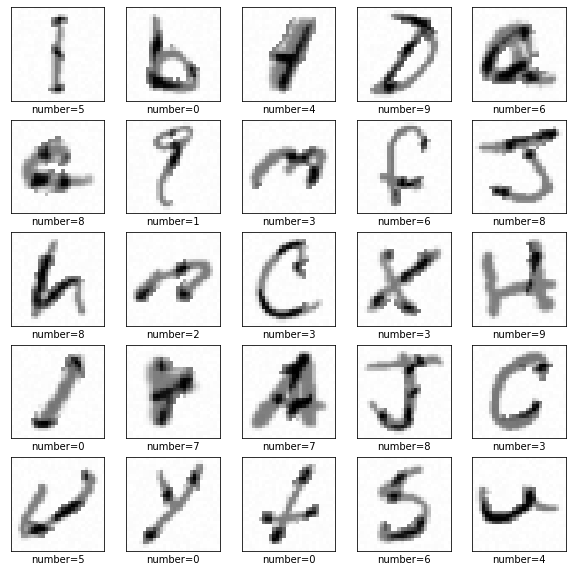

In [17]:
# train의 데이터
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # 한줄에 5개, 5줄로 그린다. 그중에 i+1 번째칸에 그린다.
    plt.xticks([])       # 이미지 그릴때 가로축의 눈금 그리지 않는다.
    plt.yticks([])       # 이미지 그릴때 세로축의 눈금 그리지 않는다.
    plt.grid(False)      # 이미지 내의 눈금을 그리지 않는다.
    plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
    plt.xlabel(number_class_names[raw_train_y[i]])
plt.show()

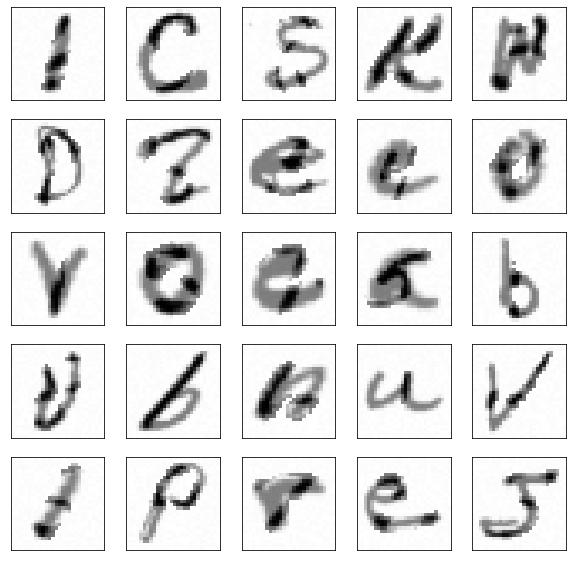

In [18]:
#test의 데이터
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # 한줄에 5개, 5줄로 그린다. 그중에 i+1 번째칸에 그린다.
    plt.xticks([])       # 이미지 그릴때 가로축의 눈금 그리지 않는다.
    plt.yticks([])       # 이미지 그릴때 세로축의 눈금 그리지 않는다.
    plt.grid(False)      # 이미지 내의 눈금을 그리지 않는다.
    plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
plt.show()

#Normalization

In [19]:
print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255 # 0~255까지의 수치를 255로 나누어서 0~1의 수치로 변환한다.
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))
print(train_y)


255
255
1.0
1.0
[5 0 4 ... 9 0 5]


#로스 실시간으로 나타내기

In [20]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])



# 모델

## DNN
Dense 10을 20으로 변경

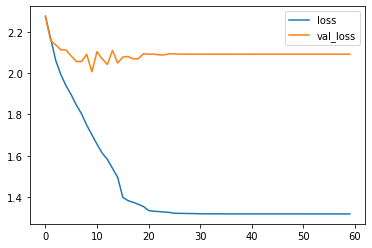

loss =  1.3192002773284912 , val_loss =  2.091294050216675
Epoch 00060: early stopping


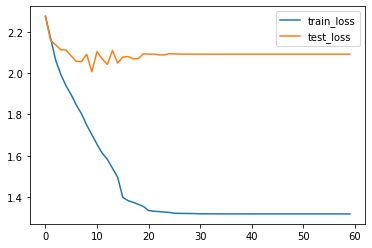

64/64 [==============================] - 0s 2ms/step - loss: 1.3965 - accuracy: 0.5347
loss= 1.396485686302185
acc= 0.53466796875
elapsed : 23.639520406723022


In [21]:
model = keras.Sequential()

model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # 정수형 자료의 입출력이므로 loss 에서 SCC (Sparse categorical entropy ) 사용

#-------------------------------------------------------------------------------------------------------------모델 저장, early stopping, 학습율 조정
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau                       


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]
#-----------------------------------------------------------------------------------------------------------------------------

start_time = time.time()
history = model.fit(train_x, train_y, validation_split=0.1, epochs=100, verbose=0, callbacks=callbacks, batch_size=16) # validation data set을 위해 10% 만큼 분리하여 사용


plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()
loss, acc = model.evaluate(train_x, train_y)
print("loss=",loss)
print("acc=",acc)

print("elapsed : {}".format(time.time() - start_time))

##CNN

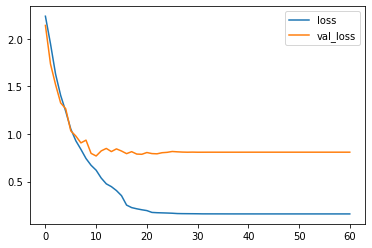

loss =  0.16055725514888763 , val_loss =  0.8088459968566895
Epoch 00061: early stopping


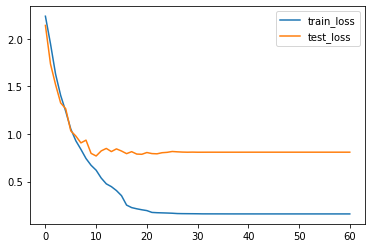

64/64 [==============================] - 1s 13ms/step - loss: 0.2254 - accuracy: 0.9463
loss= 0.22544939815998077
acc= 0.9462890625
elapsed : 162.6628782749176


In [22]:
model = keras.Sequential()

model.add(Input((28,28)))
model.add(Reshape((28,28,1)))                                    # ADDED
model.add(Conv2D(32, (3, 3), padding="same", activation="relu")) # ADDED # 입출력 이미지 사이즈가 같으므로 padding 에는 same
model.add(MaxPooling2D((2, 2)))                                  # ADDED
model.add(Conv2D(64, (3, 3), padding="same", activation="relu")) # ADDED
model.add(MaxPooling2D((2, 2)))                                  # ADDED

model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

start_time = time.time()
history = model.fit(train_x, train_y, validation_split=0.1, epochs=100, verbose=0, callbacks=callbacks, batch_size=16)


plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()
loss, acc = model.evaluate(train_x, train_y)
print("loss=",loss)
print("acc=",acc)

print("elapsed : {}".format(time.time() - start_time))

##overfitting

* Dropout
* BatchNormalization
* regularizer


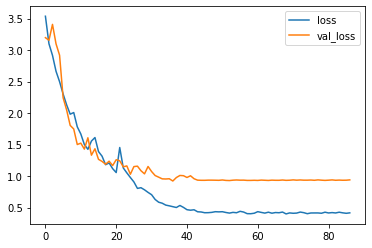

loss =  0.41743671894073486 , val_loss =  0.9403938055038452
Epoch 00087: early stopping


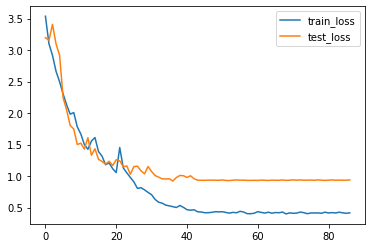

64/64 [==============================] - 1s 16ms/step - loss: 0.3129 - accuracy: 0.9785
loss= 0.31285884976387024
acc= 0.978515625
elapsed : 311.6710584163666


In [23]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

model = keras.Sequential()

model.add(Input((28,28)))
model.add(Reshape((28,28,1))) 
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), padding="same", activation="relu")) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 

model.add(Flatten())
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

start_time = time.time()
history = model.fit(train_x, train_y, validation_split=0.1, epochs=100, verbose=0, callbacks=callbacks, batch_size=16)


plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()
loss, acc = model.evaluate(train_x, train_y)
print("loss=",loss)
print("acc=",acc)

print("elapsed : {}".format(time.time() - start_time))

- **1번**
- 노드 : 20 -> 30
- 히든 레이어 : 3개 -> 4개
- Conv2D : 3개 ->4개

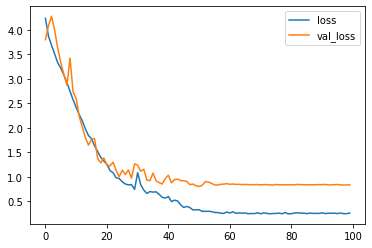

loss =  0.25716638565063477 , val_loss =  0.8340681791305542


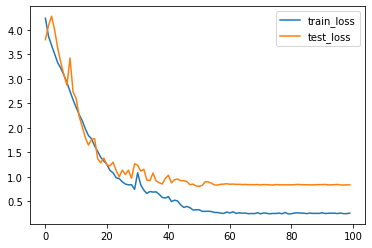

64/64 [==============================] - 2s 21ms/step - loss: 0.2399 - accuracy: 0.9810
loss= 0.23989997804164886
acc= 0.98095703125
elapsed : 474.0626473426819


In [24]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

model = keras.Sequential()

model.add(Input((28,28)))
model.add(Reshape((28,28,1))) 
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), padding="same", activation="relu")) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), padding="same", activation="relu")) 
model.add(BatchNormalization())                                   
model.add(MaxPooling2D((2, 2)))                                   

model.add(Flatten())
model.add(Dense(30, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu', kernel_regularizer=l2())) 
model.add(BatchNormalization())                                  
model.add(Dropout(0.2))                                          
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

start_time = time.time()
history = model.fit(train_x, train_y, validation_split=0.1, epochs=100, verbose=0, callbacks=callbacks, batch_size=16)


plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()
loss, acc = model.evaluate(train_x, train_y)
print("loss=",loss)
print("acc=",acc)

print("elapsed : {}".format(time.time() - start_time))

- **2번**
- 노드 : 30 -> 1024

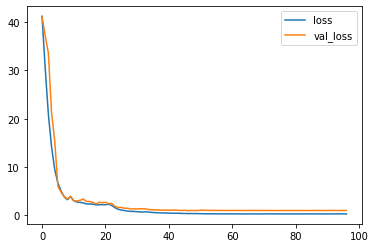

loss =  0.26803797483444214 , val_loss =  0.9707441926002502
Epoch 00097: early stopping


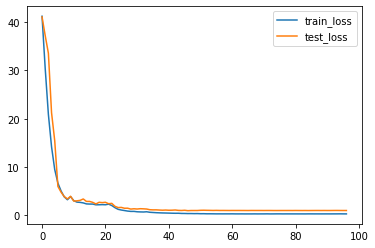

64/64 [==============================] - 3s 36ms/step - loss: 0.3282 - accuracy: 0.9819
loss= 0.3282177150249481
acc= 0.98193359375
elapsed : 1135.7067687511444


In [25]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

model = keras.Sequential()

model.add(Input((28,28)))
model.add(Reshape((28,28,1))) 
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), padding="same", activation="relu")) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), padding="same", activation="relu")) 
model.add(BatchNormalization())                                   
model.add(MaxPooling2D((2, 2)))                                  

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2())) 
model.add(BatchNormalization())                               
model.add(Dropout(0.2))                                        
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

start_time = time.time()
history = model.fit(train_x, train_y, validation_split=0.1, epochs=100, verbose=0, callbacks=callbacks, batch_size=16)


plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()
loss, acc = model.evaluate(train_x, train_y)
print("loss=",loss)
print("acc=",acc)

print("elapsed : {}".format(time.time() - start_time))

- 제출 결과 
0.8235294118/
0.8177155257

- **3번**
- Conv2D : 3개 -> 4개
- 히든 레이어 : 4개 -> 5개

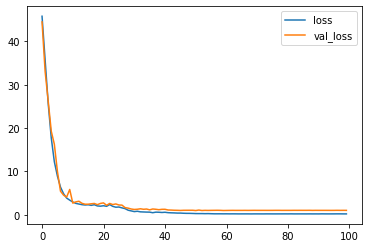

loss =  0.18398424983024597 , val_loss =  0.9994882941246033


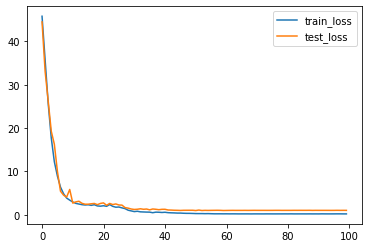

64/64 [==============================] - 3s 39ms/step - loss: 0.2555 - accuracy: 0.9839
loss= 0.25553351640701294
acc= 0.98388671875
elapsed : 1347.3061680793762


In [27]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

model = keras.Sequential()

model.add(Input((28,28)))
model.add(Reshape((28,28,1))) 
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), padding="same", activation="relu")) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), padding="same", activation="relu")) 
model.add(BatchNormalization())                                   
model.add(MaxPooling2D((2, 2)))      
model.add(Conv2D(256, (3, 3), padding="same", activation="relu")) 
model.add(BatchNormalization())                                   
model.add(MaxPooling2D((2, 2)))                                  

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2())) 
model.add(BatchNormalization())                               
model.add(Dropout(0.2))       
model.add(Dense(1024, activation='relu', kernel_regularizer=l2())) 
model.add(BatchNormalization())                               
model.add(Dropout(0.2))                                        
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

start_time = time.time()

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

start_time = time.time()
history = model.fit(train_x, train_y, validation_split=0.1, epochs=100, verbose=0, callbacks=callbacks, batch_size=16)


plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()
loss, acc = model.evaluate(train_x, train_y)
print("loss=",loss)
print("acc=",acc)


print("elapsed : {}".format(time.time() - start_time))

- 제출결과
0.8333333333/
0.8136713356

#예측해보기

In [26]:
submission_1 = pd.read_csv('/content/drive/MyDrive/cau_temp/number_data/submission.csv')
submission_1['digit'] = np.argmax(model.predict(test_x), axis=1)
submission_1.head(5)

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3


#예측한 데이터 다운로드

In [ ]:
from pandas import DataFrame
from google.colab import files # 파일을 다운받기 위해서 import

In [ ]:
submission_1.to_csv('result8.csv')

In [ ]:
files.download('result8.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>